In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merging all the data/files from the Sales_Data folder

In [26]:
data = [file for file in os.listdir('./Sales_Data')]
combined_data = pd.DataFrame()
for file in data:
    df = pd.read_csv('./Sales_Data/' + file)
    combined_data = pd.concat([combined_data,df])
combined_data.to_csv('combined_data.csv',index=False)

In [27]:
df = pd.read_csv('./combined_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [28]:
df.shape

(186850, 6)

### Data Cleaning

#### Removing Nan Values

In [29]:
df_nan =  df[df.isna().any(axis=1)]

df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [30]:
df = df[df['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [36]:
df['Quantity Ordered']= df['Quantity Ordered'].astype('int32')
df['Price Each']= df['Price Each'].astype('float32')

### Adding a month column

In [31]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [32]:
df['Month']= df['Month'].astype('int32')

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


### Adding a Sales Column

In [39]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.950000
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.000000
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.989990
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.990005
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.989998


### Best month for sales

In [42]:
sales = df.groupby('Month').sum()['Sales']

<BarContainer object of 12 artists>

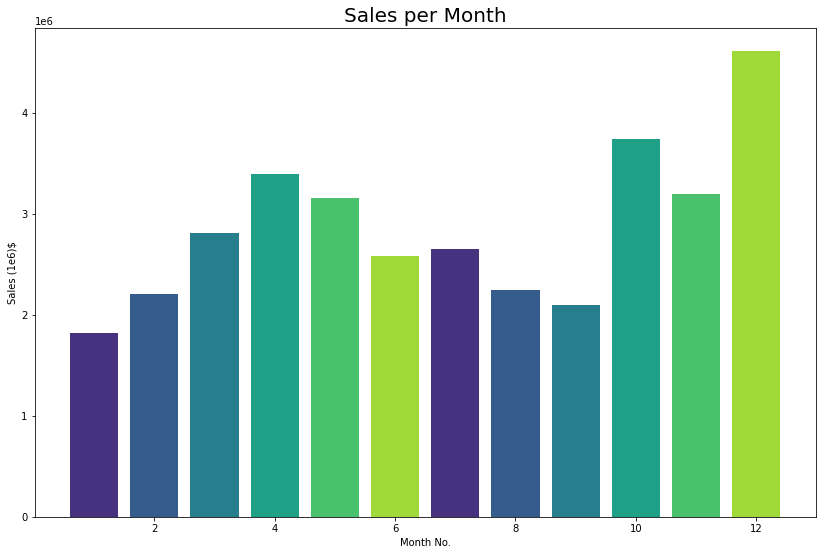

In [73]:
months = np.arange(1,13)
plt.figure(figsize=(14,9))
plt.title('Sales per Month', fontsize=20)
plt.xlabel('Month No.')
plt.ylabel('Sales (1e6)$')
plt.bar(months,sales, color=sns.color_palette('viridis'))

### Best City for Sales

In [51]:
def city(address):
    return address.split(',')[1]
def state(address):
    return address.split(',')[2].split(' ')[1]

In [55]:

df['City'] = df['Purchase Address'].apply(lambda x: city(x) + ' ' + state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.950000,Portland ME
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.000000,San Francisco CA
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.989990,Los Angeles CA
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.990005,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.989998,San Francisco CA


In [61]:
best_cities = df.groupby('City').sum()['Sales']
best_cities

City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64

Text(0.5, 0, 'City')

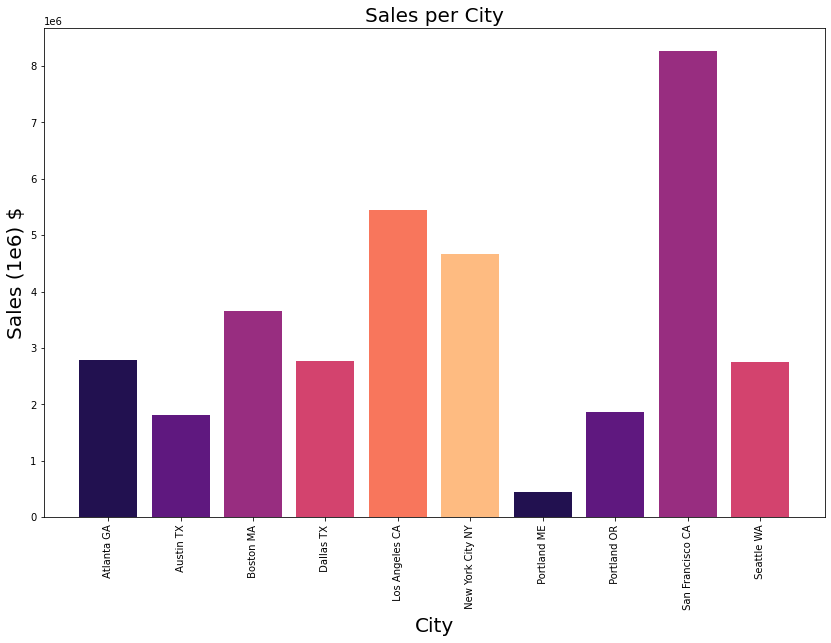

In [117]:
cities = [city for city, city_df in df.groupby('City')]
plt.figure(figsize=(14,9))
plt.bar(cities,best_cities,color=sns.color_palette('magma'))
plt.xticks(cities,rotation='vertical')
plt.title('Sales per City', fontsize=20)
plt.ylabel('Sales (1e6) $', fontsize=20)
plt.xlabel('City', fontsize=20)

### Analysing the 'Order Date' column to figure out the appropriate time to make advertisements should be made to customers

In [75]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [76]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950000,Portland ME
1,209922,Macbook Pro Laptop,1,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000000,San Francisco CA
2,209923,ThinkPad Laptop,1,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.989990,Los Angeles CA
3,209924,27in FHD Monitor,1,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990005,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.989998,San Francisco CA


In [121]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,209921,USB-C Charging Cable,1,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950000,Portland ME,19,34,1
1,209922,Macbook Pro Laptop,1,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000000,San Francisco CA,10,5,1
2,209923,ThinkPad Laptop,1,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.989990,Los Angeles CA,20,18,1
3,209924,27in FHD Monitor,1,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990005,Seattle WA,10,21,1
4,209925,Bose SoundSport Headphones,1,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.989998,San Francisco CA,18,58,1


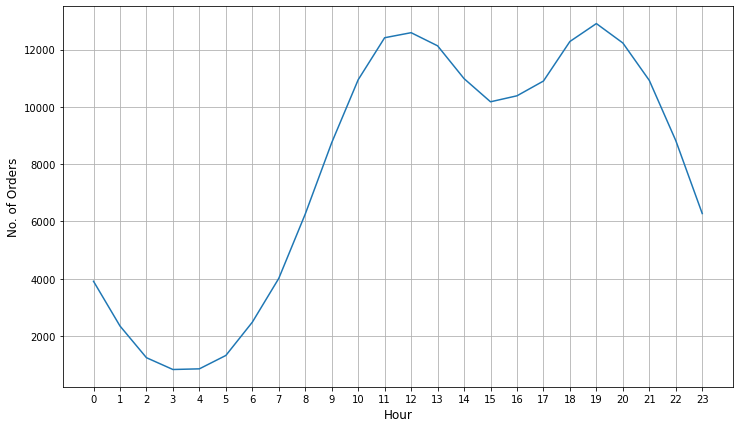

In [129]:
keys = [pair for pair, hour_df in df.groupby(['Hour'])]
plt.figure(figsize=(12,7))
plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.xlabel('Hour',size=12)
plt.ylabel('No. of Orders',size=12)
plt.show()


### Products that are often sold together

In [92]:
df_1 = df[df['Order ID'].duplicated(keep=False)]
df_1['Grouped'] = df_1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_1 =df_1[['Order ID','Grouped']].drop_duplicates()
df_1.head()

/tmp/ipykernel_7073/2059441936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Grouped'] = df_1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"


In [93]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Most sold Products

Text(0.5, 1.0, 'Quantity of products sold')

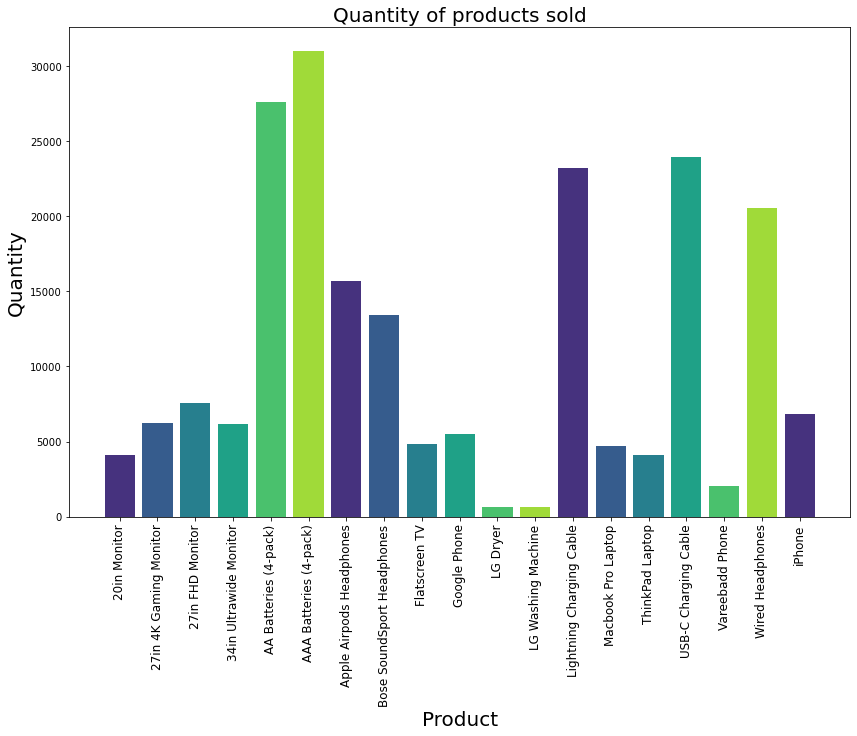

In [99]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.figure(figsize=(14,9))
plt.bar(keys, quantity_ordered,color=sns.color_palette('viridis'))
plt.xticks(keys, rotation='vertical', size=12)
plt.ylabel('Quantity',fontsize=20)
plt.xlabel('Product',fontsize=20)
plt.title('Quantity of products sold',fontsize=20)

/tmp/ipykernel_7073/2164215674.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=12)
/tmp/ipykernel_7073/2164215674.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


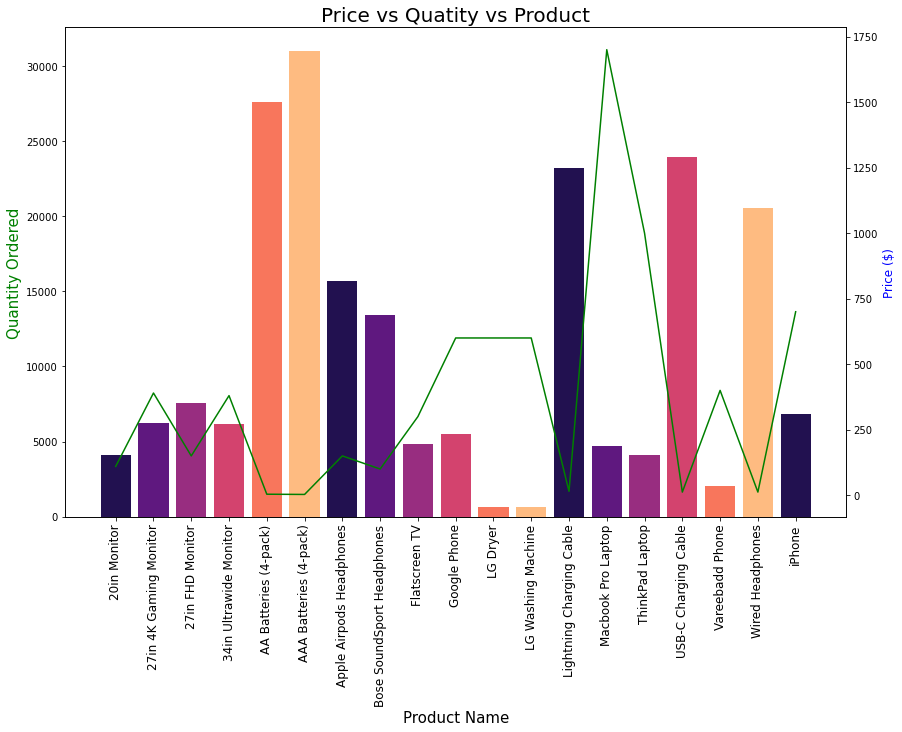

In [115]:
prices = df.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots(figsize=(14,9))
plt.title('Price vs Quatity vs Product', size=20)
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color=sns.color_palette('magma'))
ax2.plot(keys, prices, color='g')

ax1.set_xlabel('Product Name',size=15)
ax1.set_ylabel('Quantity Ordered', color='g',size=15)
ax2.set_ylabel('Price ($)', color='b',size=12)
ax1.set_xticklabels(keys, rotation='vertical', size=12)

fig.show()